In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
df = pd.read_csv(
    "/content/pltr_ts_processed.csv",
    index_col=0,
    parse_dates=True
)

ts_return = df['log_return'].dropna()

<Figure size 1200x400 with 0 Axes>

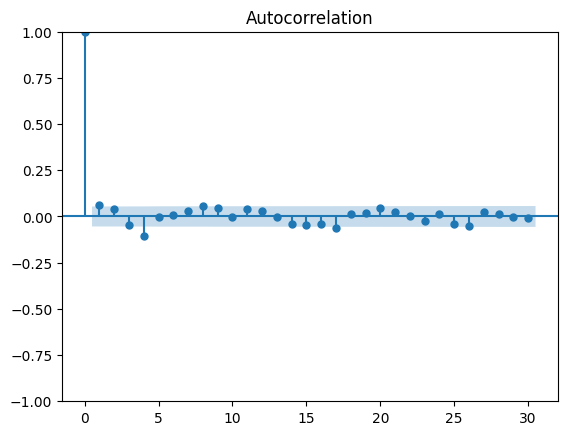

<Figure size 1200x400 with 0 Axes>

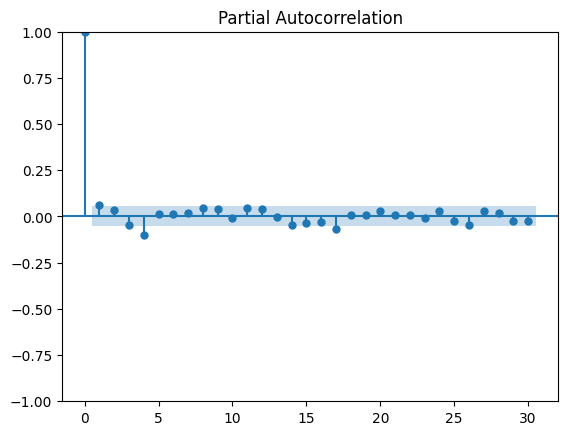

In [5]:
plt.figure(figsize=(12,4))
plot_acf(ts_return, lags=30)
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(ts_return, lags=30, method="ywm")
plt.show()

In [6]:
model = ARIMA(ts_return, order=(1,0,1))
model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             log_return   No. Observations:                 1311
Model:                 ARIMA(1, 0, 1)   Log Likelihood                2242.602
Date:                Fri, 19 Dec 2025   AIC                          -4477.203
Time:                        09:57:25   BIC                          -4456.489
Sample:                             0   HQIC                         -4469.434
                               - 1311                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.001      1.683      0.092      -0.000       0.005
ar.L1          0.2349      0.349      0.673      0.501      -0.449       0.919
ma.L1         -0.1712      0.355     -0.483      0.6

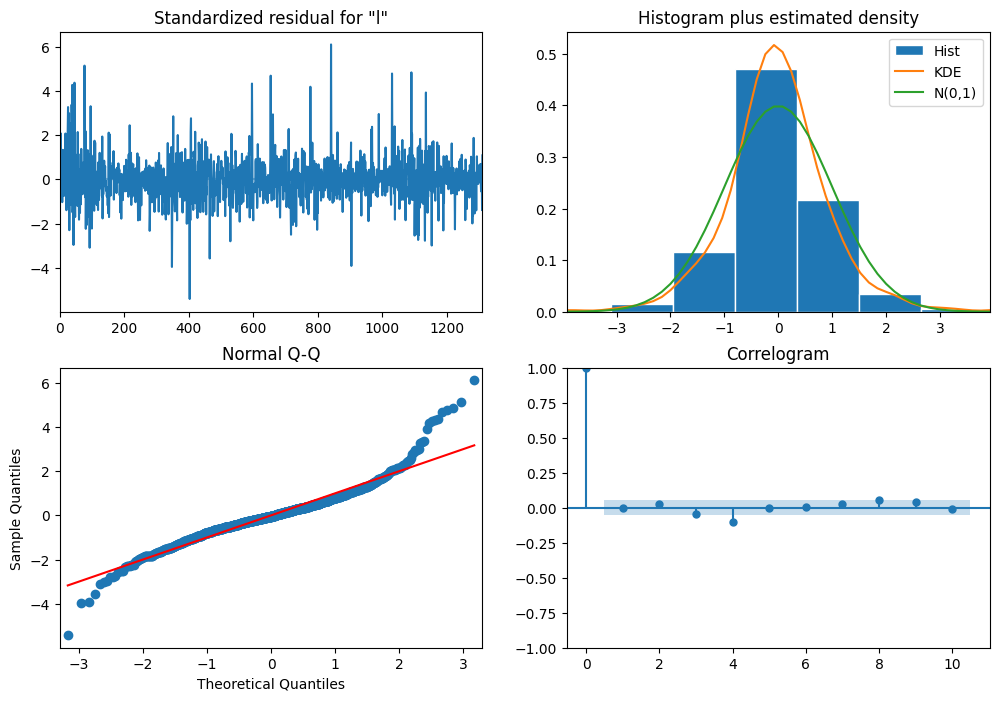

In [7]:
model_fit.plot_diagnostics(figsize=(12,8))
plt.show()

In [8]:
forecast_steps = 5

forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


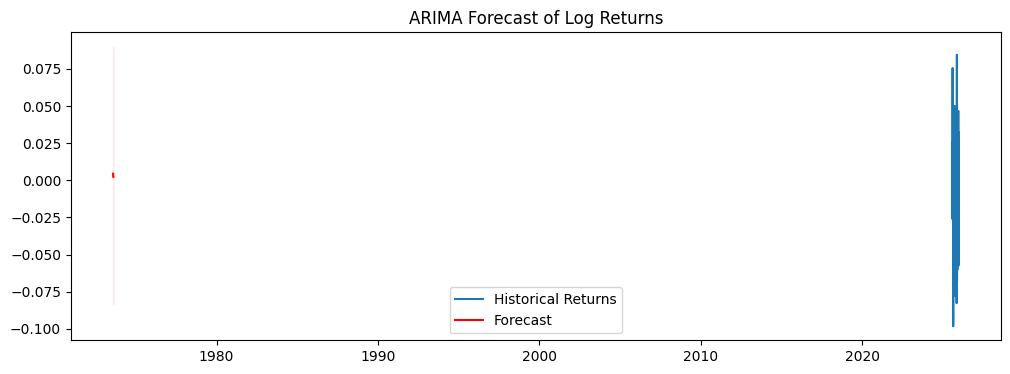

In [9]:
plt.figure(figsize=(12,4))
plt.plot(ts_return[-100:], label="Historical Returns")
plt.plot(forecast_mean, label="Forecast", color="red")
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:,0],
    forecast_ci.iloc[:,1],
    color="pink",
    alpha=0.3
)
plt.legend()
plt.title("ARIMA Forecast of Log Returns")
plt.show()

In [10]:
last_price = df['price'].iloc[-1]

price_forecast = last_price * np.exp(forecast_mean.cumsum())
price_forecast

,predicted_mean
1311,186.519283
1312,187.038338
1313,187.484972
1314,187.915285
1315,188.342493


In [11]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [12]:
# Define train-test split
train_size = int(len(ts_return) * 0.7)

train = ts_return.iloc[:train_size]
test  = ts_return.iloc[train_size:]

history = train.copy()
predictions = []

# Walk-forward loop
for t in range(len(test)):
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit()

    yhat = model_fit.forecast(steps=1)[0]
    predictions.append(yhat)

    # expand window
    history = pd.concat([history, test.iloc[t:t+1]])


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

KeyError: 0

In [13]:
ts_return = ts_return.asfreq("B")  # Business day frequency
ts_return = ts_return.dropna()

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

train_size = int(len(ts_return) * 0.7)

train = ts_return.iloc[:train_size]
test  = ts_return.iloc[train_size:]

history = train.copy()
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=1)
    yhat = forecast.iloc[0]   # ✅ FIX HERE

    predictions.append(yhat)

    history = pd.concat([history, test.iloc[t:t+1]])

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [15]:
rmse = np.sqrt(mean_squared_error(test, predictions))
rmse

np.float64(0.040444245313311776)

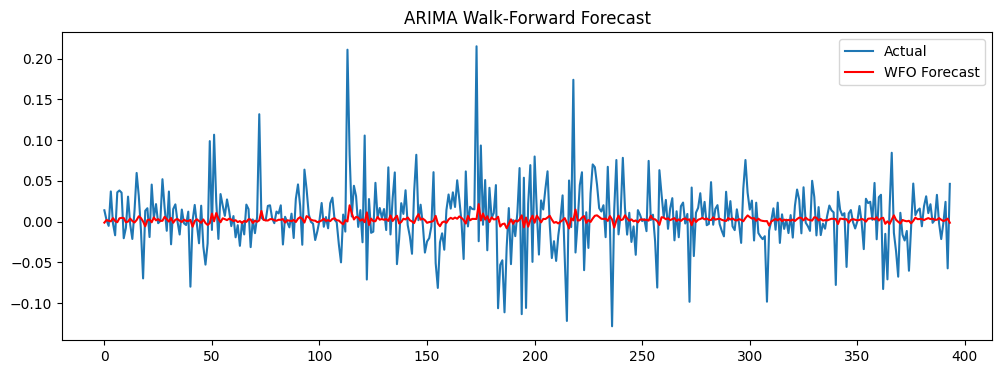

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(test.values, label="Actual")
plt.plot(predictions, label="WFO Forecast", color="red")
plt.title("ARIMA Walk-Forward Forecast")
plt.legend()
plt.show()

In [19]:
import numpy as np
import pandas as pd

arima_actuals = np.asarray(test.values).ravel()
arima_preds   = np.asarray(predictions).ravel()


In [20]:
pd.DataFrame({
    "actual": arima_actuals,
    "arima_pred": arima_preds
}).to_csv("/content/arima_wfo_predictions.csv", index=False)


In [21]:
import os
os.path.exists("/content/arima_wfo_predictions.csv")


True